In [44]:
import os
import pandas as pd
import json
from math import sqrt
from statistics import stdev
import matplotlib.pyplot as plt

# Read in data

In [2]:
pth = './logs/vae/'
inc_mean = {} #key is dataset size, value is array of value from each trial
inc_stdv = {}
frechet = {}

In [3]:
for dir in sorted(os.listdir(pth)):
    with open(pth + dir + '/testresult.txt', 'r') as f:
        t = f.readlines()
    
    model_params = json.loads(t[-1][:297].replace("'", '"'))
    data_params = json.loads(t[-1][297:].replace("'", '"'))
    print(dir, data_params['num_samples'])
    n = data_params['num_samples']

    inc_mean[n] = inc_mean.get(n,[]) + [float(t[2][:-1])]
    inc_stdv[n] = inc_stdv.get(n,[]) + [float(t[4][:-8])]
    frechet[n] = frechet.get(n,[]) + [float(t[5][:-1])]

version_0 10
version_1 100
version_10 10
version_11 100
version_12 1000
version_13 10000
version_14 0
version_2 1000
version_3 10000
version_4 0
version_5 10
version_6 100
version_7 1000
version_8 10000
version_9 0


In [4]:
print(inc_mean, inc_stdv, frechet)

{10: [1.5360757112503052, 1.5828708410263062, 1.630061388015747], 100: [1.4328395128250122, 1.53204345703125, 1.5902345180511475], 1000: [1.4681416749954224, 1.5676189661026, 1.7746057510375977], 10000: [1.5323759317398071, 1.503147006034851, 1.7225350141525269], 0: [2.242168426513672, 2.17270827293396, 2.316798448562622]} {10: [0.03471027687191963, 0.04180832579731941, 0.028450598940253258], 100: [0.015072164125740528, 0.033860690891742706, 0.035150788724422455], 1000: [0.01991458237171173, 0.04118170589208603, 0.029399437829852104], 10000: [0.03322194516658783, 0.0323769673705101, 0.06084293872117996], 0: [0.06439793109893799, 0.034459516406059265, 0.07925412803888321]} {10: [2.824334144592285, 1.7041414976119995, 2.638275146484375], 100: [5.199808597564697, 3.1644976139068604, 2.1599228382110596], 1000: [2.254225730895996, 2.553575038909912, 2.208819627761841], 10000: [2.8143391609191895, 2.8771893978118896, 2.9234869480133057], 0: [2.6189658641815186, 2.6963915824890137, 2.72763729

# Aggregate statistics across trials

In [45]:
x = []
inc = []
istd = []
fid = []
fstd = []

In [46]:
for k in sorted(inc_mean.keys()):
    x.append(k)
    inc.append(sum(inc_mean[k])/3)
    # print(sqrt(sum([s**2 for s in inc_stdv[k]])))
    stdk = sqrt(sum([s**2 for s in inc_stdv[k]]))
    istd.append(stdk)
    fid.append(sum(frechet[k])/3)
    fstd.append(stdev(frechet[k]))

In [47]:
print(x, inc, istd, fid, fstd, sep='\n')

[0, 10, 100, 1000, 10000]
[2.243891716003418, 1.5830026467641194, 1.5183724959691365, 1.6034554640452068, 1.5860193173090618]
[0.1077764752251934, 0.06133657967770344, 0.051081253577495454, 0.05437692926171267, 0.07651031857855582]
[2.6809982458750405, 2.3889169295628867, 3.5080763498942056, 2.3388734658559165, 2.8716718355814614]
[0.05594717024396372, 0.6002853753398235, 1.548793439535194, 0.18731791866864364, 0.05478268409461712]


In [48]:
for l in [x, inc, istd, fid, fstd]:
    fullsize = l[0]
    l[0:-1] = l[1:]
    l[-1] = fullsize

In [49]:
print(x, inc, istd, fid, fstd, sep='\n')

[10, 100, 1000, 10000, 0]
[1.5830026467641194, 1.5183724959691365, 1.6034554640452068, 1.5860193173090618, 2.243891716003418]
[0.06133657967770344, 0.051081253577495454, 0.05437692926171267, 0.07651031857855582, 0.1077764752251934]
[2.3889169295628867, 3.5080763498942056, 2.3388734658559165, 2.8716718355814614, 2.6809982458750405]
[0.6002853753398235, 1.548793439535194, 0.18731791866864364, 0.05478268409461712, 0.05594717024396372]


In [50]:
x[-1] = 70000

# Plot

Text(0.5, 0, 'dataset size')

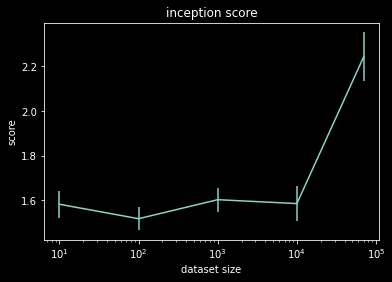

In [54]:
plt.errorbar(x, inc, istd)
plt.xscale('log')
plt.title('inception score')
plt.ylabel('score')
plt.xlabel('dataset size')

Text(0.5, 0, 'dataset size')

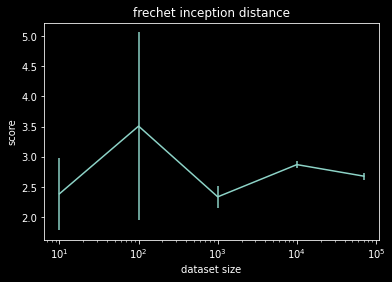

In [55]:
plt.errorbar(x, fid, fstd)
plt.xscale('log')
plt.title('frechet inception distance')
plt.ylabel('score')
plt.xlabel('dataset size')